# Quantitative exercise
Samuel Horacek (horacek@kth.se), Eugene Park (epark@kth.se)

II2202 Research methodology

25.9.2024

## Step 1

In [1]:
# Do the pre-processing necessary to load the data into the analysis tool that is to be used for your project. 
# While using R is recommended, the actual choice of tool is up to each of the groups.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We have chosen the LakeHuron dataset - https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/LakeHuron.html

In [2]:
## Select a data set from the R Datasets Package https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html Links to an external site.
## If you choose another tool than R, load the data into the analysis tool.

dataset = pd.read_csv('data/LakeHuron.csv')

In [3]:
## Identify which are your independent variables and which are your dependent variables. 

print(dataset)

## Write a description of the expected properties of each of these variables.

## Perform exploratory data analysis. Does your data have the expected properties? 
## If not, can you identify why it does not?

    year   level
0   1875  580.38
1   1876  581.86
2   1877  580.97
3   1878  580.80
4   1879  579.79
..   ...     ...
93  1968  578.52
94  1969  579.74
95  1970  579.31
96  1971  579.89
97  1972  579.96

[98 rows x 2 columns]


The independent variable is the YEAR, the dependent variable is the LEVEL (the water level of the lake).

We expect both of these variables to be numerical and continous variables.

The YEAR represents the years measurements were taken. The dataset page describes the measurements to be taken between the years 1875 (inclusive) and 1972 (inclusive).
It is interval data, and we expect the measurements to be not newer than the current year (2024).

The LEVEL represents ratio data. It is measured in feet, and thus has a true zero point (level of 0 feet would indicate the absence of water). Because of this, we expect LEVEL not to ever be a negative value. 
More so, in contrast to YEAR, which increases monotonically, we expect the LEVEL to fluctuate around a certain mean.
That being said, it is possible that the water level could be affected by long-term trends, such as many of the large lakes drying up globally (https://www.science.org/doi/10.1126/science.abo2812).

We have found the data to have the expected properties. Both variables are of the expected type, there are no missing years (measurements) and LEVEL seems to be around the same value, as anticipated. 

In [4]:
## Identify what statistical tools you will apply to analyze your data. 
## If you have a model for the relationship between the independent and the dependent variables, fit your data to this model. 
## If you do not have a model, what could you do to identify a model, for example, using principal component analysis?
## Generate some visual aids (such as tables or graphs) to present your data to others.

Our hypothesis, due to recent trends in decrease of water mass in the world's largest lakes is that: "With time, the water level of Lake Huron will have a decreasing trajectory." 

We will explore the data from various perspectives:
- We will start by describing the LEVEL variable. 
- Then the relationship between the two variables, by using correlation analysis.
- Finally, we will try to fit a trend line to our plots, to validate or invalidate our hypothesis.

### Plots

In [5]:
# Descriptive/summary statistics
dataset['level'].describe()

count     98.000000
mean     579.004082
std        1.318299
min      575.960000
25%      578.135000
50%      579.120000
75%      579.875000
max      581.860000
Name: level, dtype: float64

In [6]:
# Correlation between the two variables
dataset[['year', 'level']].corr()

,year,level
year,1.000000,-0.521989
level,-0.521989,1.000000


We can see some degree of negative correlation between YEAR and a LEVEL (-0.522). 

Let's see how these values have evolved with time, using a line plot: 

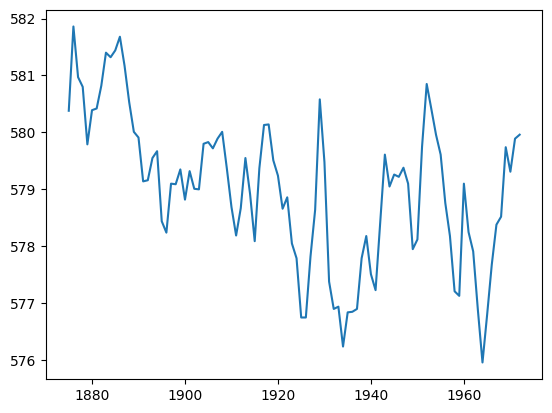

In [7]:
plt.plot(dataset['year'], dataset['level'])

We can smooth out the plot, using a rolling window.

<Axes: >

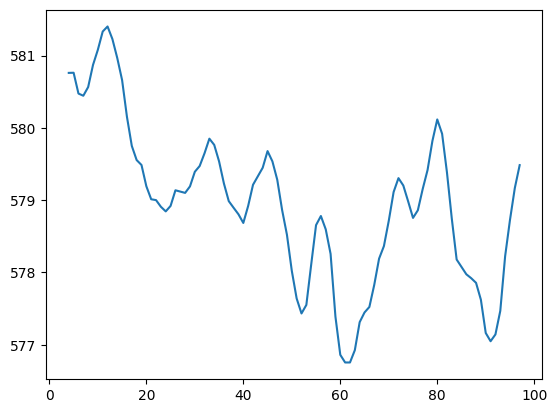

In [8]:
dataset['level'].rolling(window=5).mean().plot()

Finally, to get a good sense of a trend, we can see the scatter plot below:

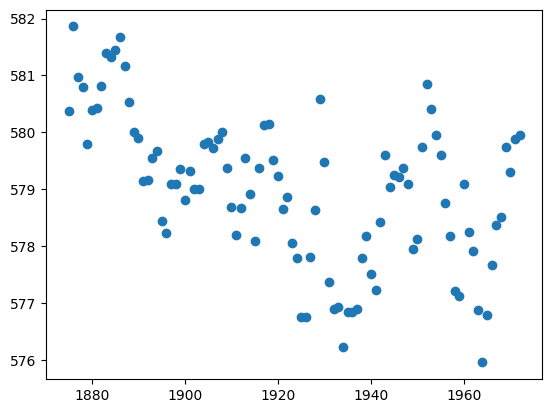

In [9]:
plt.scatter(dataset['year'], dataset['level'])

To understand the trend, let's find the best fitting linear trend line, shown on the same plot:

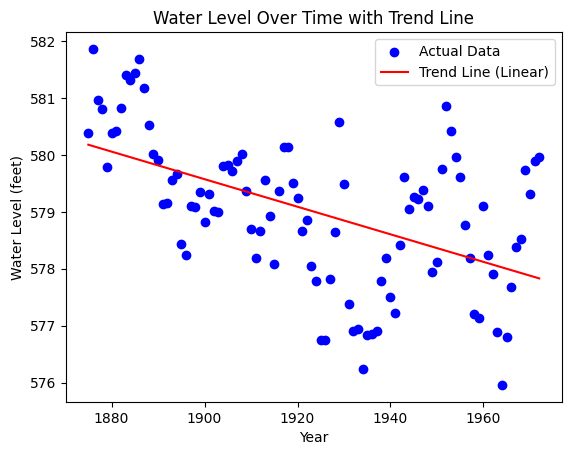

In [10]:
plt.scatter(dataset['year'], dataset['level'], color='blue', label='Actual Data')

# Use NumPy's polyfit to find the best-fitting linear trend line
# 1st-degree polynomial (linear trend)
coefficients = np.polyfit(dataset['year'], dataset['level'], 1)
slope, intercept = coefficients
trend_line = slope * dataset['year'] + intercept

plt.plot(dataset['year'], trend_line, color='red', label='Trend Line (Linear)')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Water Level (feet)')
plt.title('Water Level Over Time with Trend Line')
plt.legend()

plt.show()

With such a trend line, we can expect the water line to decrease and we thus confirm out hypothesis.

Interestingly, looking at the current water levels of the Lake Huron (and adjectent lake Michigan using tools such as https://www.glerl.noaa.gov/data/wlevels/dashboard/) it is clear that years around 1960 were particularly low in terms of water level. This trend would not continue and the water levels have kept around their long-term mean (578.87ft).
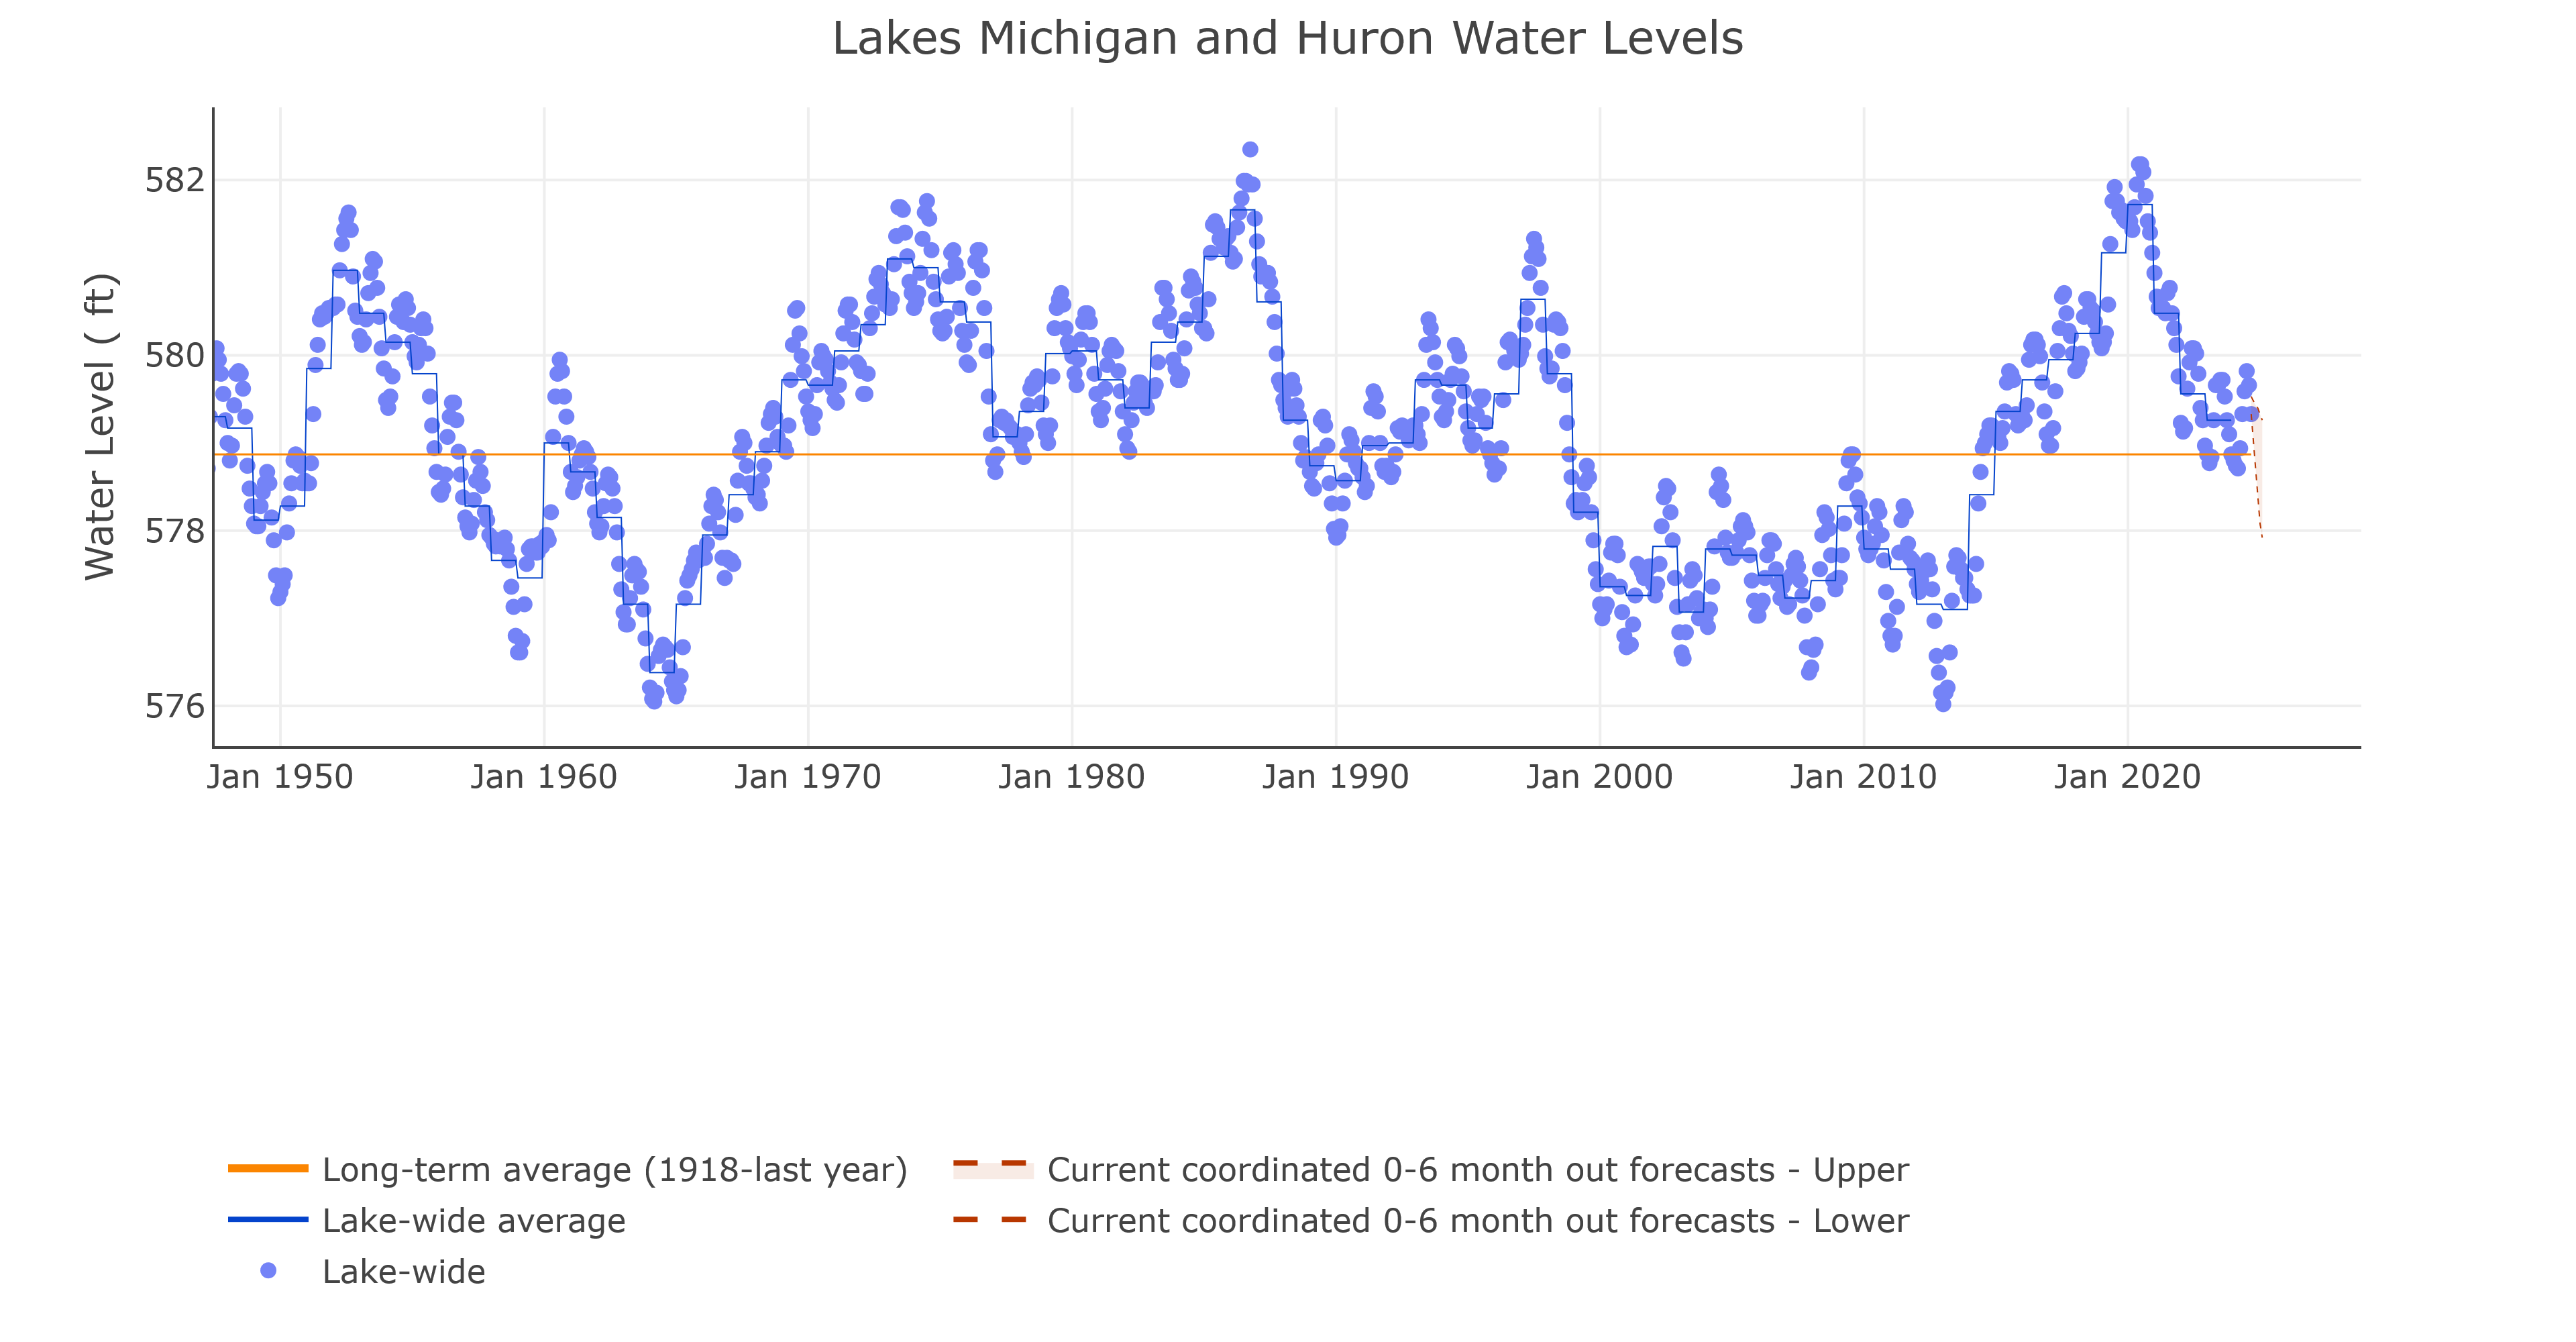

Lastly, we can try training a Linear regression model, that could predict the water levels of future years. In our example, of the next year following the end of the dataset - 1973.

In [11]:
from sklearn.linear_model import LinearRegression

X = dataset['year'].values.reshape(-1, 1)
y = dataset['level'].values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
next_year = np.array([[1973]])
predicted_level = model.predict(next_year)
print(f"Predicted water level for 1973: {predicted_level[0]}")

Predicted water level for 1973: 577.8061266568484


## Step 2

In [13]:
# Load the data, as a set of read %, write %, median latency
data_path = 'data/'
file_names = ['25percent_writes', '50percent_writes', '75percent_writes']

In [14]:
# Read files
line_beginning_string = "Median Latency := "

def read_median_latency_from_file(file_path):
    with open(file_path, "r") as file:
        for line in file.readlines():
            li = line.lstrip()
            if li.startswith(line_beginning_string):
                return li

In [15]:
line_ending_string = " milliseconds per request"

data = []

for file_name in file_names: 
    latency_line = read_median_latency_from_file(data_path + file_name + ".txt")
    str_latency_in_milliseconds = latency_line[len(line_beginning_string):len(line_ending_string)]
    latency_in_milliseconds = float(str_latency_in_milliseconds)

    str_write_percentage = file_name[:2]
    write_percentage = int(str_write_percentage)
    read_percentage = 100 - write_percentage
    
    data.append({
        'write_percentage': write_percentage,
        'read_percentage': read_percentage,
        'mean_latency_in_milliseconds': latency_in_milliseconds
    })

df = pd.DataFrame(data)
df

,write_percentage,read_percentage,mean_latency_in_milliseconds
0,25,75,449.0
1,50,50,455.0
2,75,25,26174.0


In [16]:
## Identify which are your independent variables and which are your dependent variables. 

print(df)

## Write a description of the expected properties of each of these variables.

## Perform exploratory data analysis. Does your data have the expected properties? 
## If not, can you identify why it does not?

   write_percentage  read_percentage  mean_latency_in_milliseconds
0                25               75                         449.0
1                50               50                         455.0
2                75               25                       26174.0


The independent variables are write_percentage and read_percentage, the dependent variable is the mean_latency_in_milliseconds (latency = time it takes to transmit a message).

We expect both of these variables to be numerical and continous variables.

The independent variables represent the percentage of the type of requests, made over a 60 second window. We thus expect these to be percentages to be in the range <0,100>. 

The mean_latency_in_milliseconds represents ratio data, since it has a true zero point (0 latency suggests absence of any delay). As its name suggests, it is in milliseconds. We thus assume it can not be of negative value.

We have found the data to have the expected properties. Both variables are of the expected type and there are no missing values.

In [17]:
## Identify what statistical tools you will apply to analyze your data. 
## If you have a model for the relationship between the independent and the dependent variables, fit your data to this model. 
## If you do not have a model, what could you do to identify a model, for example, using principal component analysis?
## Generate some visual aids (such as tables or graphs) to present your data to others.

We will use similar statistical tools as in the previous step. We will start by applying descriptive statistics (.describe()). We will then inspect the correlation between the independent and dependent variables. Finally, we will use plots as visual aid.


Thanks to already performing exploratory data analysis (EDA), we can make the assumption that the more write requests, the higher the mean latency in milliseconds. This implies it takes longer to process (more accurate term in terms of a Paxos-like system would be "decide") a write request, in comparison to a read request.

In contrast to the previous step, we assume a polynomial model.

### Plots

In [18]:
# Descriptive/summary statistics
df['mean_latency_in_milliseconds'].describe()

count        3.000000
mean      9026.000000
std      14850.603927
min        449.000000
25%        452.000000
50%        455.000000
75%      13314.500000
max      26174.000000
Name: mean_latency_in_milliseconds, dtype: float64

In [19]:
# Correlation between the two variables
df[['write_percentage', 'mean_latency_in_milliseconds']].corr()

,write_percentage,mean_latency_in_milliseconds
write_percentage,1.000000,0.866126
mean_latency_in_milliseconds,0.866126,1.000000


This shows a very strong correlation between write_percentage and mean_latency_in_milliseconds.

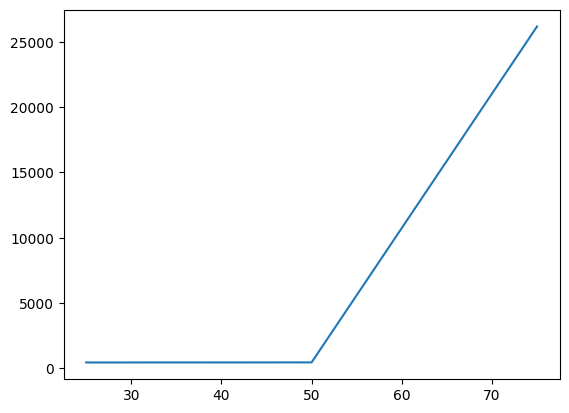

In [20]:
plt.plot(df['write_percentage'], df['mean_latency_in_milliseconds'])

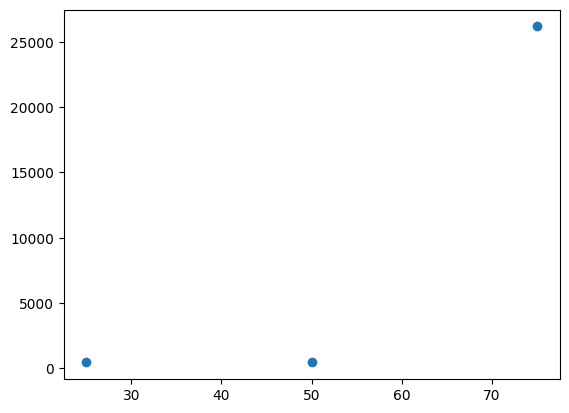

In [21]:
plt.scatter(df['write_percentage'], df['mean_latency_in_milliseconds'])

Let's try to train to fit our polynomial model.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

x = df['write_percentage'].to_numpy()
y = df['mean_latency_in_milliseconds']

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

y_predicted = poly_reg_model.predict(poly_features)

y_predicted

array([  449.,   455., 26174.])

As we can see, our polynomial model most likely overfitted on our limited number of data points.

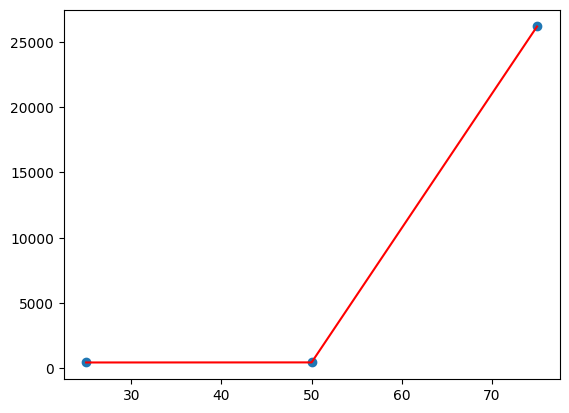

In [23]:
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()

## Step 3 (Summary)